<a href="https://colab.research.google.com/github/sagar9926/ImportantConcepts-/blob/master/Python/MPNeuronAndPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X = breast_cancer.data
y = breast_cancer.target

In [4]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
print(X.shape,y.shape)

(569, 30) (569,)


In [0]:
import pandas as pd

In [7]:
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data['class'] = breast_cancer.target

In [9]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
print(data['class'].value_counts())

1    357
0    212
Name: class, dtype: int64


In [11]:
print(breast_cancer.target_names)

['malignant' 'benign']


In [12]:
data.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Train Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop(['class'],axis = 1)
y = data['class']

In [15]:
type(X)

pandas.core.frame.DataFrame

In [0]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,stratify = y, random_state=1) 
#, random_state=1 makes sure the same split happens every thime this chunk is ran

In [17]:
print(y.shape, y_train.shape, y_test.shape)

(569,) (512,) (57,)


In [18]:
print(y_train.mean(),y_test.mean(),y.mean())

0.626953125 0.631578947368421 0.6274165202108963


## Binarisation of input as MP neurtakes only binary numbers as input

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


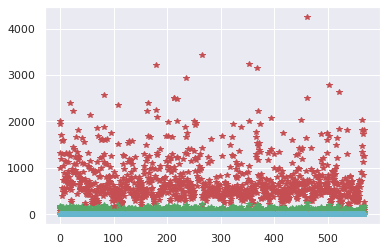

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(X_train,"*")
plt.show()

In [20]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
430,14.900,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.097110,0.2041,0.06898,0.2530,0.8749,3.4660,24.190,0.006965,0.062130,0.07926,0.022340,0.01499,0.005784,16.35,27.57,125.40,832.7,0.1419,0.70900,0.901900,0.247500,0.2866,0.11550
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.8480,19.870,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,13.76,20.70,89.88,582.6,0.1494,0.21560,0.305000,0.065480,0.2747,0.08301
105,13.110,15.56,87.21,530.2,0.13980,0.17650,0.20710,0.096010,0.1925,0.07692,0.3908,0.9238,2.4100,34.660,0.007162,0.029120,0.05473,0.013880,0.01547,0.007098,16.31,22.40,106.40,827.2,0.1862,0.40990,0.637600,0.198600,0.3147,0.14050
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,0.3416,1.3120,2.2750,20.980,0.010980,0.012570,0.01031,0.003934,0.02693,0.002979,11.15,24.62,71.11,380.2,0.1388,0.12550,0.064090,0.025000,0.3057,0.07875
547,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.024380,0.1669,0.06714,0.1144,1.0230,0.9887,7.326,0.010270,0.030840,0.02613,0.010970,0.02277,0.005890,10.83,22.04,71.08,357.4,0.1461,0.22460,0.178300,0.083330,0.2691,0.09479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.074880,0.1506,0.05491,0.3971,0.8282,3.0880,40.730,0.006090,0.025690,0.02713,0.013450,0.01594,0.002658,20.42,25.84,139.50,1239.0,0.1381,0.34200,0.350800,0.193900,0.2928,0.07867
183,11.410,14.92,73.53,402.0,0.09059,0.08155,0.06181,0.023610,0.1167,0.06217,0.3344,1.1080,1.9020,22.770,0.007356,0.037280,0.05915,0.017120,0.02165,0.004784,12.37,17.70,79.12,467.2,0.1121,0.16100,0.164800,0.062960,0.1811,0.07427
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,0.2719,1.3500,1.7210,22.450,0.006383,0.008008,0.00186,0.002924,0.02571,0.002015,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,0.2338,1.3530,1.7350,20.200,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917


In [21]:
X_train.T

,430,48,105,467,547,365,295,567,297,172,506,488,115,466,218,74,461,484,79,226,37,44,324,13,277,134,83,153,327,68,392,61,0,435,70,438,284,305,71,524,...,112,10,560,26,177,8,548,268,34,123,486,207,357,409,211,289,11,53,86,266,398,77,125,537,532,472,259,227,476,453,33,65,188,479,509,201,183,285,49,161
mean radius,14.900000,12.050000,13.110000,9.668000,10.26000,20.440000,13.770000,20.600000,11.760000,15.460000,12.220000,11.680000,11.930000,13.140000,19.800000,12.310000,27.420000,15.730000,12.860000,10.440000,13.030000,13.170000,12.200000,15.850000,18.810000,18.450000,19.100000,11.150000,12.030000,9.029000,15.490000,8.598000,17.990000,13.980000,18.940000,13.850000,12.890000,11.600000,8.88800,9.847000,...,14.260000,16.020000,14.050000,14.580000,16.460000,13.000000,9.683000,12.870000,16.130000,14.500000,14.640000,17.010000,13.870000,12.270000,11.840000,11.370000,15.780000,18.220000,14.480000,10.600000,11.060000,18.050000,13.850000,11.690000,13.680000,14.920000,15.530000,15.000000,14.200000,14.530000,19.270000,14.780000,11.810000,16.250000,15.460000,17.540000,11.410000,12.580000,13.490000,19.190000
mean texture,22.530000,14.630000,15.560000,18.100000,16.58000,21.780000,13.270000,29.330000,18.140000,11.890000,20.040000,16.170000,21.530000,20.740000,21.560000,16.520000,26.270000,11.280000,18.000000,15.460000,18.420000,21.810000,15.210000,23.950000,19.980000,21.910000,26.290000,13.080000,17.930000,17.330000,19.970000,20.980000,10.380000,19.620000,21.310000,19.600000,15.700000,24.490000,14.64000,15.680000,...,19.650000,23.240000,27.150000,21.530000,20.110000,21.820000,19.340000,16.210000,17.880000,10.890000,16.850000,20.260000,16.210000,17.920000,18.940000,18.890000,17.890000,18.700000,21.460000,18.950000,14.830000,16.150000,17.210000,24.440000,16.330000,14.930000,33.560000,15.510000,20.530000,13.980000,26.470000,23.940000,17.390000,19.510000,23.950000,19.320000,14.920000,18.400000,22.300000,15.940000
mean perimeter,102.100000,78.040000,87.210000,61.060000,65.85000,133.800000,88.060000,140.100000,75.000000,102.500000,79.470000,75.490000,76.530000,85.980000,129.700000,79.190000,186.900000,102.800000,83.190000,66.620000,82.610000,85.420000,78.010000,103.700000,120.900000,120.200000,129.100000,70.870000,76.090000,58.790000,102.400000,54.660000,122.800000,91.120000,123.600000,88.680000,84.080000,74.230000,58.79000,63.000000,...,97.830000,102.700000,91.380000,97.410000,109.300000,87.500000,61.050000,82.380000,107.000000,94.280000,94.210000,109.700000,88.520000,78.410000,75.510000,72.170000,103.600000,120.300000,94.250000,69.280000,70.310000,120.200000,88.440000,76.370000,87.760000,96.450000,103.700000,97.450000,92.410000,93.860000,127.900000,97.400000,75.270000,109.800000,103.800000,115.100000,73.530000,79.830000,86.910000,126.300000
mean area,685.000000,449.300000,530.200000,286.300000,320.80000,1293.000000,582.700000,1265.000000,431.100000,736.900000,453.100000,420.500000,438.600000,536.900000,1230.000000,470.900000,2501.000000,747.200000,506.300000,329.600000,523.800000,531.500000,457.900000,782.700000,1102.000000,1075.000000,1132.000000,381.900000,446.000000,250.500000,744.700000,221.800000,1001.000000,599.500000,1130.000000,592.600000,516.600000,417.200000,244.00000,293.200000,...,629.900000,797.800000,600.400000,644.800000,832.900000,519.800000,285.700000,512.200000,807.200000,640.700000,666.000000,904.300000,593.700000,466.100000,428.000000,396.000000,781.000000,1033.000000,648.200000,346.400000,378.200000,1006.000000,588.700000,406.400000,575.500000,686.900000,744.900000,684.500000,618.400000,644.200000,1162.000000,668.300000,428.900000,815.800000,731.300000,951.600000,402.000000,489.000000,561.000000,1157.000000
mean smoothness,0.099470,0.103100,0.139800,0.083110,0.08877,0.091500,0.091980,0.117800,0.099680,0.125700,0.109600,0.112800,0.097680,0.086750,0.093830,0.091720,0.108400,0.104300,0.099340,0.105300,0.089830,0.097140,0.086730,0.084010,0.089230,0.094300,0.121500,0.097540,0.076830,0.106600,0.116000,0.124300,0.118400,0.106000,0.09009

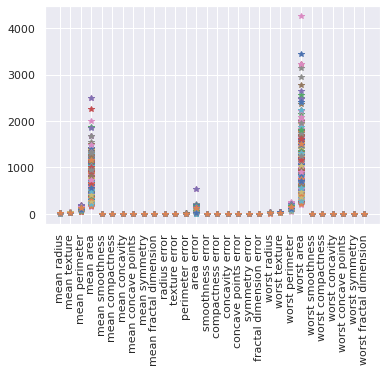

In [22]:
plt.plot(X_train.T,"*")
plt.xticks(rotation = 'vertical')
plt.show()

In [0]:
# Binarisation

X_binarised_3_train = X_train["mean area"].map(lambda x : 0 if x < 1000 else 1)

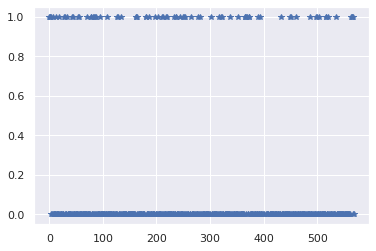

In [24]:
plt.plot(X_binarised_3_train,"*")

In [0]:
#Binarisation in one single command

X_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

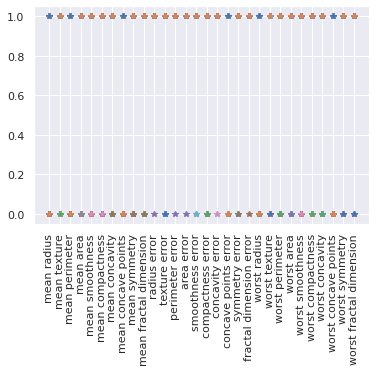

In [26]:
plt.plot(X_binarised_train.T,"*")
plt.xticks(rotation = "vertical")
plt.show()

In [0]:
X_binarised_test = X_test.apply(pd.cut,bins = 2,labels = [1,0])

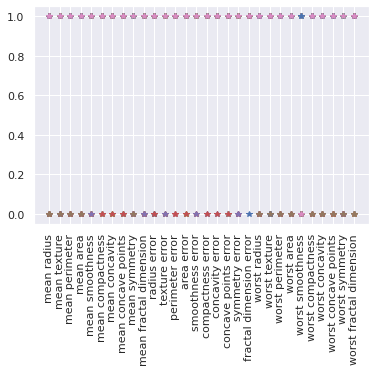

In [28]:
plt.plot(X_binarised_test.T,"*")
plt.xticks(rotation = "vertical")
plt.show()

### MP neuron Model

In [0]:
X_binarised_train = X_binarised_train.apply( lambda x : x.astype(int))

In [0]:
X_binarised_train = X_binarised_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [31]:
X_binarised_train.shape

(512, 30)

In [0]:
from random import randint

In [33]:
b = 3

i = randint(0,X_binarised_train.shape[0])
print(i)

if (np.sum(X_binarised_train.iloc[i,:])>=b):
  print("MP neuron Inference is malignant")
else:
  print("MP neuron Inference is benign")  

if (y_train[i] == 1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')



112
MP neuron Inference is malignant
Ground truth is benign


In [34]:
b = 28

Y_pred_train = []
accurate_rows = 0

for x, y in zip(X_binarised_train.iterrows(), y_train):
  y_pred = (np.sum(x[1]) >= b)
  Y_pred_train.append(y_pred)
  accurate_rows += (y == y_pred)
  
print(accurate_rows, accurate_rows/X_binarised_train.shape[0])
  

435 0.849609375


In [35]:
for b in range(X_binarised_train.shape[1]+10):
  Y_pred_train = []
  accurate_rows = 0

  for x, y in zip(X_binarised_train.iterrows(), y_train):
    y_pred = (np.sum(x[1]) >= b)
    Y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)
    
  print(b, accurate_rows/X_binarised_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625
31 0.373046875
32 0.373046875
33 0.373046875
34 0.373046875
35 0.373046875
36 0.373046875
37 0.373046875
38 0.373046875
39 0.373046875


In [0]:
from sklearn.metrics import accuracy_score

In [37]:
b = 28

Y_pred_test = []

for x in X_binarised_test.iterrows():
  y_pred = (np.sum(x[1]) >= b)
  Y_pred_test.append(y_pred)

accuracy = accuracy_score(Y_pred_test, y_test)

print(b, accuracy)  

28 0.7894736842105263


# MP neuron class

In [0]:
class MPNeuron:
  
  def __init__(self):
    self.b = None
    
  def model(self, x):
    return(sum(x) >= self.b)
  
  def predict(self, X):
    Y = []
    for x in X.iterrows():
      result = self.model(x[1])
      Y.append(result)
    return np.array(Y)
  
  def fit(self, X, Y):
    accuracy = {}
    
    for b in range(X.shape[1] + 1):
      self.b = b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred, Y)
      
    best_b = max(accuracy, key = accuracy.get)
    self.b = best_b
    
    print('Optimal value of b is', best_b)
    print('Highest accuracy is', accuracy[best_b])

In [39]:
mp_neuron = MPNeuron()
mp_neuron.fit(X_binarised_train, y_train)

Optimal value of b is 28
Highest accuracy is 0.849609375


In [0]:
Y_test_pred = mp_neuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, y_test)

In [41]:
print(accuracy_test)

0.7894736842105263


# Perceptron 

$y = 1, \mbox{if} \sum_i w_i x_i >= b$

$y =  0, \mbox{otherwise}$

In [0]:
#run this on non binarised data
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

X_train = X_train.values
X_test = X_test.values


In [0]:
class Perceptron:

  def __init__(self):
    self.w = None  #array
    self.b = None  #Scaler


  def model(self,x):
    return 1 if (np.dot(self.w,x) >= self.b) else 0 #this will return the output class for single given input

  def predict(self,X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return(Y)

  def fit(self,X,Y,epochs = 1,lr = 1): 
    #implement the perceptron learning algorithm

    # initialization

    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0

    wt_matrix = []
    

    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred = self.model(x)

        if(y == 1 and y_pred == 0):
          self.w = self.w + lr*x      # actual positive but w.x < 0 i.e theta greater than 90 thus we add becoz as cos(theta) increases theta decreases, cos(theta) is propotional to w dot x  
          self.b = self.b - lr*1
          
        elif(y == 0 and y_pred == 1):
          self.w = self.w - lr*x
          self.b = self.b + lr*1
      wt_matrix.append(self.w) 
      accuracy[i] = accuracy_score(self.predict(X), Y)  
      if(accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
          
    self.w = chkptw
    self.b = chkptb   
    print("Max_Accuracy :", max_accuracy)
    plt.plot(list(accuracy.values()))
    plt.ylim([0 ,1])
    plt.show()

    return(np.array(wt_matrix))



In [0]:
perceptron = Perceptron()


Max_Accuracy : 0.92578125


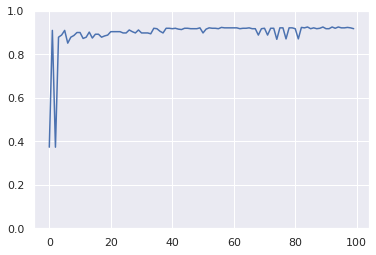

In [121]:
wt_matrix = perceptron.fit(X_train,y_train,epochs = 100)


In [123]:
type(wt_matrix)

numpy.ndarray

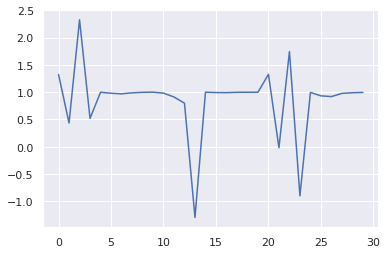

In [112]:
plt.plot(perceptron.w)
plt.show()

In [111]:
Y_pred_train = perceptron.predict(X_train)
print(accuracy_score(Y_pred_train, y_train))

0.92578125


In [113]:
Y_pred_test = perceptron.predict(X_test)
print(accuracy_score(Y_pred_test, y_test))

0.9298245614035088


## Animation

In [125]:
wt_matrix

array([[ 4.47870000e+02,  8.34890000e+02,  2.71577000e+03, ...,
        -7.86000000e-02,  1.40287000e+01,  4.93439000e+00],
       [ 7.24670000e+02,  1.32721000e+03,  4.36202000e+03, ...,
        -1.60860000e+00,  2.12801000e+01,  7.03858000e+00],
       [ 8.99463000e+02,  1.63852000e+03,  5.37866000e+03, ...,
        -3.39190000e+00,  2.51837000e+01,  8.16329000e+00],
       ...,
       [ 4.93006600e+03,  1.25358000e+03,  2.41368600e+04, ...,
        -2.02035456e+02, -4.69534000e+01, -2.18061100e+01],
       [ 4.95262600e+03,  1.21387000e+03,  2.42079100e+04, ...,
        -2.04438796e+02, -4.87487000e+01, -2.24546300e+01],
       [ 4.97484600e+03,  1.18214000e+03,  2.42819200e+04, ...,
        -2.06583106e+02, -5.00117000e+01, -2.30128900e+01]])

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

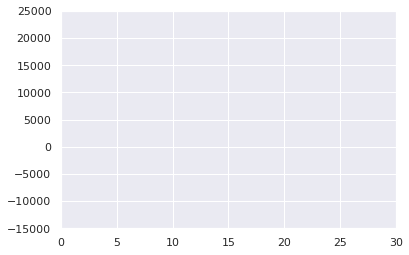

In [126]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, wt_matrix.shape[1]))
ax.set_ylim((-15000, 25000))

line, = ax.plot([], [], lw=2)

In [0]:
# animation function. This is called sequentially
def animate(i):
    x = list(range(wt_matrix.shape[1]))
    y = wt_matrix[i, :]
    line.set_data(x, y)
    return (line,)

In [0]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=100, interval=200, blit=True)

In [129]:
HTML(anim.to_html5_video())